In [7]:
# Importing Packages 
import pandas as pd
import numpy as np
import geopandas as gpd
#!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import OSM
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.mpl.geoaxes
import xarray as xr
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore') # Ignore warnings

In [2]:
# Importing layers for maps:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #groundmap
city_data = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')) #cities map (to plot Nairobi)
kenya= gpd.read_file(r'C:\Users\Tori\Downloads\ken_adm_iebc_20191031_shp\ken_admbnda_adm0_iebc_20191031.shp') #Special outline of Kenya
counties = gpd.read_file(r'C:\Users\Tori\Downloads\ken_adm_iebc_20191031_shp\ken_admbnda_adm1_iebc_20191031.shp') #Outline of counties in Kenya

In [3]:
# read coordinates file and create geometry
kenya_path = r'C:\Users\Tori\OneDrive\Documents\paper.gertrude\Kenya_points.csv'
df = pd.read_csv(kenya_path, delimiter = ";")
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.latitude, df.longitude))
df_geo

,Country,Region,Place,longitude,latitude,geometry
0,Kenya,K4,Kirnyaga,-0.500000,37.333330,POINT (37.33333 -0.50000)
1,Kenya,K4,Kiambu,-1.166670,36.833330,POINT (36.83333 -1.16667)
2,Kenya,K4,Thika,-1.050000,37.083333,POINT (37.08333 -1.05000)
3,Kenya,K4,Embu,-0.531120,37.450610,POINT (37.45061 -0.53112)
4,Kenya,K4,Machackos,-1.516670,37.266670,POINT (37.26667 -1.51667)
5,Kenya,K4,Kitui,-1.366960,38.010550,POINT (38.01055 -1.36696)
6,Kenya,K4,Nyandarua,-0.549998,36.616664,POINT (36.61666 -0.55000)
7,Kenya,K4,Kibwezi,-2.416665,37.966663,POINT (37.96666 -2.41667)
8,Kenya,K4,Nairobi,-1.283330,36.816670,POINT (36.81667 -1.28333)
9,Kenya,K5,Mt. Elgon,0.849997,34.716664,POINT (34.71666 0.85000)


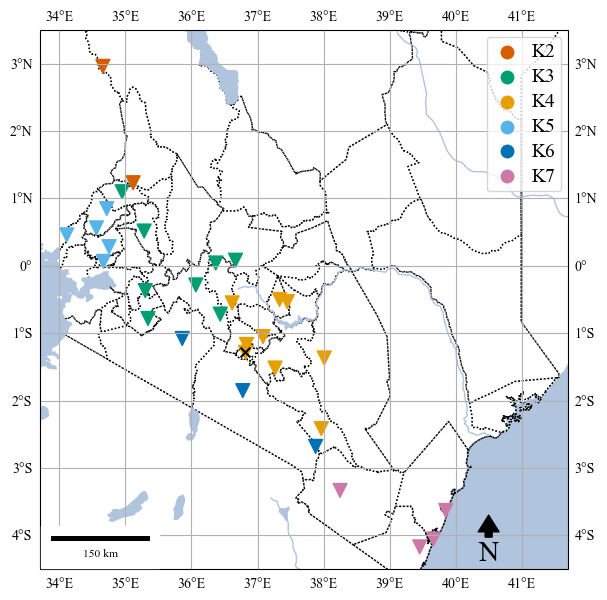

In [4]:
# Plot map of Kenya, version 1

fig = plt.figure(figsize=(7, 7))

# Define map projection and extent
plt.rcParams['font.family'] = 'Times New Roman'
crs_map = ccrs.Mollweide()
extent_map_geo = (50, 45.0, 35.0, 55.0)

custom_cmap = matplotlib.colors.ListedColormap(['#D55E00', '#009E73','#E69F00', '#56B4E9','#0072B2','#CC79A7'])
#custom_cmap = matplotlib.colors.ListedColormap(['#a559aa', '#59a89c', '#f0c571','#e7bcbc', '#082a54','#e02b35'])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color = 'white')
ax.add_feature(cfeature.OCEAN, color = 'lightsteelblue')
#ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.LAKES, color = 'lightsteelblue')
ax.add_feature(cfeature.RIVERS, color = 'lightsteelblue')
#ax.add_feature(cfeature.BORDERS ,linestyle=':')
ax.set_extent([33.70, 41.7, -4.5, 3.5], crs=ccrs.PlateCarree())
#PlateCarree())
counties.plot(ax = ax, edgecolor = 'black', color = 'none', linestyle=':')
kenya.plot(ax = ax, edgecolor = 'black', color = 'none', linestyle=':')
df_geo.plot(figsize=(7, 7), ax = ax, column = 'Region', markersize = 100, legend = True, marker ='v', cmap = custom_cmap)
city_data.plot(ax= ax, color = 'black', edgecolor = None, marker = 'x', markersize = 50) 
            
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
#ax.north_arrow().scale_bar()
#ax.coastlines(resolution='10m')
#ax.background_img(name='BM', resolution='low')
#ax.stock_img()
plt.setp(ax.get_legend().get_texts(), fontsize='14')  

#Add north arrow, https://stackoverflow.com/a/58110049/604456
x, y, arrow_length = 0.85, 0.10, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
            
            
# Add a custom north arrow
x, y = 0.05, 0.95  # Position of the arrow (in figure coordinates)
arrow_length = 0.1  # Length of the arrow


from matplotlib_scalebar.scalebar import ScaleBar

# Add a scale bar 
scalebar = ScaleBar(100000,  # 100 km in meters
                    units='m', 
                    location='lower left',
                    pad=0.7,  # Padding from the figure edge
                    scale_loc='bottom', 
                    color='black',  # Color of the scale and text
                    frameon=True,  # Add a frame
                    font_properties={'size': 'small', 'family': 'Times New Roman'})  # Font customization

ax.add_artist(scalebar)

plt.show()

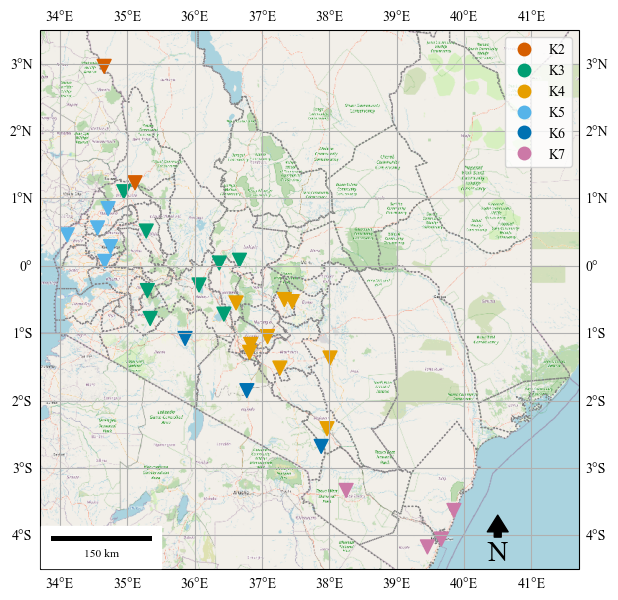

In [8]:

# Plot map of Kenya, version 2


# Create an OpenStreetMap background instance
osm_background = OSM()

# Set the map projection and extent (you can adjust the extent as needed)
crs_map = ccrs.PlateCarree()
extent_map = [33.70, 41.7, -4.5, 3.5]  # Longitude and Latitude extent for Kenya

# Create figure and add a subplot with the specified projection
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={'projection': crs_map})

# Add the OSM background
ax.add_image(osm_background, 8)  # The number 8 here is the zoom level

# Set the extent of the map
ax.set_extent(extent_map, crs=crs_map)

# Add other features to the map
#ax.add_feature(cfeature.LAND, color='white')
#ax.add_feature(cfeature.OCEAN, color='lightsteelblue')
#ax.add_feature(cfeature.LAKES, color='lightsteelblue')
#ax.add_feature(cfeature.RIVERS, color='lightsteelblue')

#PlateCarree())
counties.plot(ax = ax, edgecolor = 'gray', color = 'none', linestyle=':')
#kenya.plot(ax = ax, edgecolor = 'black', color = 'none', linestyle=':')
df_geo.plot(figsize=(7, 7), ax = ax, column = 'Region', markersize = 100, legend = True, marker ='v', cmap = custom_cmap)
#city_data.plot(ax= ax, color = 'black', edgecolor = None, marker = 'x', markersize = 50) 

# Gridlines, annotations, and other customizations
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)



#Add north arrow, https://stackoverflow.com/a/58110049/604456
x, y, arrow_length = 0.85, 0.10, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
            
            
# Add a custom north arrow
x, y = 0.05, 0.95  # Position of the arrow (in figure coordinates)
arrow_length = 0.1  # Length of the arrow


from matplotlib_scalebar.scalebar import ScaleBar

# Add a scale bar 
scalebar = ScaleBar(100000,  # 100 km in meters
                    units='m', 
                    location='lower left',
                    pad=0.7, 
                    scale_loc='bottom', 
                    color='black',  
                    frameon=True,  
                    font_properties={'size': 'small', 'family': 'Times New Roman'})  

ax.add_artist(scalebar)


plt.setp(ax.get_legend().get_texts(), fontsize='10')  


plt.show()



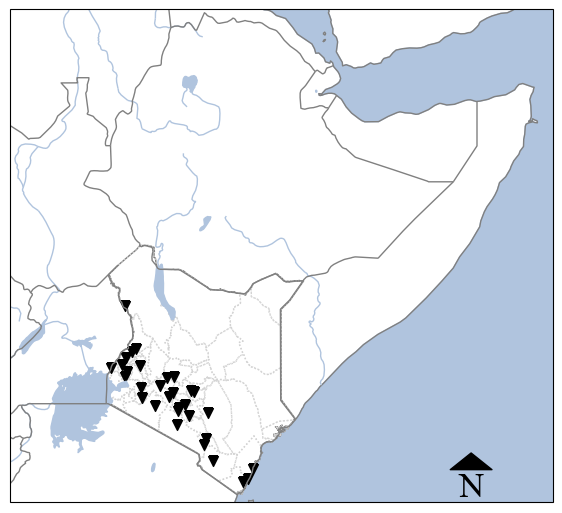

In [6]:
# Plot map, zoom out, East Africa

fig = plt.figure(figsize=(7, 7))

# Define map projection and extent
crs_map = ccrs.Mollweide()
#extent_map_geo = (40, 45.0, -35.0, 55.0)
from matplotlib.image import imread


#Features
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color ='white')
ax.add_feature(cfeature.OCEAN, color = 'lightsteelblue')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.LAKES, color = 'lightsteelblue')
ax.add_feature(cfeature.RIVERS, color = 'lightsteelblue')
ax.add_feature(cfeature.BORDERS, color = 'gray')#linestyle=':')

# Kenya
kenya.plot(ax = ax, edgecolor = 'gray', color = 'none')
ax.set_extent([30, 52, -5, 15], crs=ccrs.PlateCarree())
counties.plot(ax = ax, edgecolor = 'lightgrey', color = 'none', linestyle=':')
df_geo.plot(figsize=(10, 10), ax = ax, column = 'Region', markersize = 50, legend = False, marker ='v', color ='black')


#Add north arrow, https://stackoverflow.com/a/58110049/604456
x, y, arrow_length = 0.85, 0.10, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=10, headwidth=30),
            ha='center', va='center', fontsize=25,
            xycoords=ax.transAxes)
plt.show()